# CS224W: Machine Learning with Graphs - Homework 1
Fall 2019

## 1 Network Characteristics [25 points]
One of the goals of network analysis is to  nd mathematical models that characterize real-world
networks and that can then be used to generate new networks with similar properties. In this
problem, we will explore two famous models|Erd}os-R enyi and Small World|and compare them
to real-world data from an academic collaboration network. Note that in this problem all networks
are undirected. You may use the starter code in hw1-q1-starter.py for this problem.

 - Erdös-Rényi Random graph (G(n;m) random network): Generate a random instance of this model by using n = 5242 nodes and picking m = 14484 edges at random. Write code to construct instances of this model, i.e., do not call a SNAP function. 
 - Small-World Random Network: Generate an instance from this model as follows: begin with n = 5242 nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges. Next, connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397 and 401). This gives us another 5242 edges. Finally, randomly select 4000 pairs of nodes not yet connected and add an edge between them. In total, this will make m = 5242   2+4000 = 14484 edges. Write code to construct instances of this model, i.e., do not call a SNAP function.
 - Real-World Collaboration Network: Download this undirected network from http://snap.stanford.edu/data/ca-GrQc.txt.gz. Nodes in this network represent authors of research papers on the arXiv in the General Relativity and Quantum Cosmology section. There is an edge between two authors if they have co-authored at least one paper together. Note that some edges may appear twice in the data, once for each direction. Ignoring repeats and self-edges, there are 5242 nodes and 14484 edges. (Note: Repeats are automatically ignored when loading an (un)directed graph with SNAP's LoadEdgeList function).



In [1]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Setup
erdosRenyi = None
smallWorld = None
collabNet = None

In [3]:
# Erdös-Rényi Random graph (G(n;m) random network)
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    Graph = snap.TUNGraph.New(N,E) # Placeholder for the graph
    
    # Add N nodes
    for i in range(0,N):   
        Graph.AddNode(i)
    
    # Generate E random edges connected at random 
    for i in range(0,E): 
        v1 = np.random.randint(0,N) 
        v2 = np.random.randint(0,N)
        if (v1 == v2 or Graph.IsEdge(v1,v2)): # check to avoid self-edges and multiple edges between 2 nodes
            continue
        Graph.AddEdge(v1,v2)

    return Graph

G = genErdosRenyi()
print(G.GetNodes(), G.GetEdges() )    
print('Mean Degree', np.mean( [n.GetDeg() for n in G.Nodes()] ),
      'Median Degree', np.median( [n.GetDeg() for n in G.Nodes()] ),
      'Max Degree', np.max( [n.GetDeg() for n in G.Nodes()] ),
      'Min Degree', np.min( [n.GetDeg() for n in G.Nodes()] ) )

5242 14475
Mean Degree 5.522701259061427 Median Degree 5.0 Max Degree 15 Min Degree 0


In [4]:
def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    E = N # N edges
    Graph = snap.TUNGraph.New(N,E) # Placeholder for the graph
    
    # Add N nodes  
    for i in range(0,N): 
        Graph.AddNode(i)
    
    # Add N edges (i->i+1)
    for i in range(0,N-1): 
        Graph.AddEdge(i,i+1)
    
    Graph.AddEdge(N-1,0)
    
    return Graph

def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    # Add N edges (i->i+2)
    for i in range(0,N-2): 
        Graph.AddEdge(i,i+2)
    
    Graph.AddEdge(N-2,0)
    Graph.AddEdge(N-1,1)
    
    return Graph

def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    # Generate M random edges connected at random 
    N = G.GetNodes()
    for i in range(0,M): 
        v1 = np.random.randint(0,N) 
        v2 = np.random.randint(0,N)
        if (v1 == v2 or Graph.IsEdge(v1,v2)): # check to avoid self-edges and multiple edges between 2 nodes
            continue
        Graph.AddEdge(v1,v2)

    return Graph

def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph

G =  genSmallWorld()
print(G.GetNodes(), G.GetEdges() ) 
print('Mean Degree', np.mean( [n.GetDeg() for n in G.Nodes()] ),
      'Median Degree', np.median( [n.GetDeg() for n in G.Nodes()] ),
      'Max Degree', np.max( [n.GetDeg() for n in G.Nodes()] ),
      'Min Degree', np.min( [n.GetDeg() for n in G.Nodes()] ) )


5242 14479
Mean Degree 5.52422739412438 Median Degree 5.0 Max Degree 13 Min Degree 4


In [5]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    print('File exists: ',  os.path.isfile(path))
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1) 
    snap.DelSelfEdges(G)

    return Graph

G = loadCollabNet("data/ca-GrQc.txt")
print(G.GetNodes(), G.GetEdges() ) 
print('Mean Degree', np.mean( [n.GetDeg() for n in G.Nodes()] ),
      'Median Degree', np.median( [n.GetDeg() for n in G.Nodes()] ),
      'Max Degree', np.max( [n.GetDeg() for n in G.Nodes()] ),
      'Min Degree', np.min( [n.GetDeg() for n in G.Nodes()] ) )


File exists:  True
5242 14496
Mean Degree 5.528424265547501 Median Degree 3.0 Max Degree 81 Min Degree 1


### 1.1 Degree Distribution
Generate a random graph from both the Erdös-Rényi Random graph (G(n;m) and Small-World models and read in the collaboration network. Delete all of the self-edges in the collaboration network (there should be 14,484 total edges remaining).

Plot the degree distribution of all three networks in the same plot on a log-log scale. In other words, generate a plot with the horizontal axis representing node degrees and the vertical axis representing the proportion of nodes with a given degree (by \log-log scale" we mean that both the horizontal and vertical axis must be in logarithmic scale). In one to two sentences, describe one key di erence between the degree distribution of the collaboration network and the degree distributions of the random graph models.

In [6]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    DegToCntV = Graph.GetDegCnt() # provides a vector of pairs (degree, number of nodes of such degree)
    X = [] # placeholder for degree
    Y = [] # placeholder for number of nodes of such degree
    for item in DegToCntV:
        if item.GetVal1()>0:
            X.append(np.log10(item.GetVal1()))
            Y.append(np.log10(item.GetVal2()))
    return X, Y

def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("data/ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()



File exists:  True


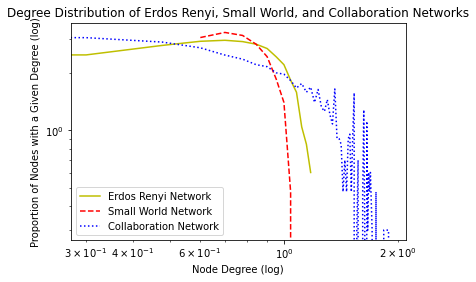

In [7]:
# Execute code for Q1.1
Q1_1()

The degree distribution represents the probability that a certain node has certain degree. The Small world network has a narrow range of node degrees since it was built by connecting each node to its neighbors and to the neighbors of its neighbors plus some random edges. So, a large proportion of nodes have the same node degree, and some nodes have a higher one. In the Erdos Renyi network all edges were generated randomly with the same likelihood, so the proportion of nodes with a given degree is mostly constant and drops steeply at a certain node degree level. As for the collaboration networks, the proportionof nodes decreases softly as the node degree increases (there are slightly less and less nodes with higher number of connections) and at a certain node degree it starts dropping with higher steep (at certain level, few nodes keep having large connections).

### 1.2 Clustering Coefficient [13 points]
Compute and report the average clustering coefficient of the three networks. For this question, write your own implementation to compute the clustering coefficient, instead of using a built-in SNAP function. Which network has the largest clustering coe cient? In one to two sentences, explain. Think about the underlying process that generated the network.

In [8]:
def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: local clustering coeffient of Node
    """
    C = 0.0
    
    if Node.GetDeg() < 2: # if we have NodeDegree < 2 return 0
        return C
    
    # iterate over neighboring nodes to look for edges among neighbor nodes
    e = 0  # placeholder for number of edges between the neighbors of node
    k = Node.GetDeg() # degree of node 
    for i in range(0, k): 
        for j in range(i + 1, k):
            if Graph.IsEdge(Node.GetNbrNId(i), Node.GetNbrNId(j)): # check if edge exists between the i-th and j-th neighboring node.
                e = e + 1
    
    C = 2 * e / (k * (k - 1)) 
    return C

def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of Graph
    """
    C = 0.0
    for Node in Graph.Nodes():
        Ci = calcClusteringCoefficientSingleNode(Node, Graph) 
        C = C + Ci
        
    N = Graph.GetNodes()
    C = C/N  # Average of all nodes
    
    return C



In [9]:
def Q1_2():
    """
    Code for Q1.2
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)

    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)



In [10]:
# Execute code for Q1.2
Q1_2()

Clustering Coefficient for Erdos Renyi Network: 0.001223
Clustering Coefficient for Small World Network: 0.284194
Clustering Coefficient for Collaboration Network: 0.530185


Clustering coefficient is a concept defined for undirected graphs. It represents how connected are the neighbors of a node to each other. The Small World Network has the highest clustering coefficient because we didn't build the edges entirely randomly as we did in the Erdos Reny Network, but we linked each node's neighbor to each other by connecting each node to the neighbors of its neighbors. We additionally introduced some random edges though. The collaboration network has an even higher clustering coefficient. My interpretation is that since this network represent authors of research papers who coauthored a paper together in the field of General Relativity and Quantum Cosmology section, which I imagine to be a pretty narrow field of research, many of the other coauthors are also coauthors with each other as they are all working in a very specific field.  

## 1 Network Characteristics [25 points]
In this problem, we will explore the structural role extraction algorithm Rolx and its recursive feature extraction method ReFex. As part of this exploration, we will work with a dataset representing a scientist co-authorship network, which can be dowloaded at http://www-personal.umich.edu/~mejn/netdata/netscience.zip. 1 Although the graph is weighted, for simplicity we treat it as undirected and unweighted in this problem. Feature extraction consists of two steps; we  first extract basic local features from every node, and we subsequently aggregate them along graph edges so that global features are also obtained. Collectively, feature extraction constructs a matrix V 2 Rn f where for each of the n nodes we have f features to cover local and global information. Rolx extracts node roles from that matrix.

### 2.1 Basic Features [5 points]
We begin by loading the graph G provided in the bundle and computing three basic features for
the nodes. For each node v, we choose 3 basic local features (in this order):
1. the degree of v, i.e., deg(v);
2. the number of edges in the egonet of v, where egonet of v is de ned as the subgraph of G
induced by v and its neighborhood;
3. the number of edges that connect the egonet of v and the rest of the graph, i.e., the number
of edges that enter or leave the egonet of v.

Compute the basic feature vector for the node with ID 9, and report the top 5 nodes that are most similar to node 9 (excluding node 9). As a sanity check, no element in ~ V9 is larger than 10.

In [11]:
def load_graph_weights(path):
    print('File exists: ',  os.path.isfile(path))
    Graph = snap.TUNGraph.Load(snap.TFIn(path))
    return Graph


In [12]:
def extract_basic_feature(node, graph):
    """
    Calculate three basic features for input node v
    1. degree of v
    2. number of edges in the egonet of node v
    3. number of edges that connect the egonet of v and the rest of the graph 
    """
    
    n_deg = node.GetDeg() # get degree of node 
    
    n_id = node.GetId() # get id of node 
    neighborhood_list = list(node.GetOutEdges())     # Get IDs of neighbors
    neighborhood_list.insert(0, n_id) 
    egonet = snap.GetSubGraph(graph, neighborhood_list) # returns an induced subgraph on the nodes of the neighborhood
    ego_edges = snap.CntUniqUndirEdges(egonet) # returns the number of unique undirected edges
    
    cross_edges = 0
    for edge in Graph.Edges():
        # subgraph non-subgraph로 나가는 outgoing edge
        if edge.GetSrcNId() in neighborhood_list and edge.GetDstNId() not in neighborhood_list:
            cross_edges = cross_edges + 1
        elif edge.GetSrcNId() not in neighborhood_list and edge.GetDstNId() in neighborhood_list:
            cross_edges = cross_edges + 1
        else: 
            pass   
    
    v = [n_deg, ego_edges, cross_edges]
    return v


In [13]:
def calc_cosine_similarity(u,v):
    if np.linalg.norm(u) == 0 or np.linalg.norm(v) == 0:
        cos_sim = 0
    else:
        cos_sim = np.dot(u, v)/(np.linalg.norm(u)*np.linalg.norm(v))
    return cos_sim

In [14]:
# basic feature vector for the node with ID 9
path = "data/hw1-q2.graph"
Graph = load_graph_weights(path)
ft_id9 = extract_basic_feature(Graph.GetNI(9), Graph)
print(ft_id9)

File exists:  True
[6, 10, 1]


In [15]:
def topk_cos_sim(target_node_id, k, Graph):

    target_node = Graph.GetNI(target_node_id)
    target_ft = extract_basic_feature(target_node, Graph)
   
    dict_sim = {} # placeholder for dictionary of basic features' similarities
    for node in Graph.Nodes():
        n_id = node.GetId() 
        n_ft = extract_basic_feature(node, Graph)
        sim_target = calc_cosine_similarity(n_ft, target_ft)
        dict_sim[n_id] = sim_target

    top5_sim = sorted(dict_sim.items(), key=lambda x: x[1], reverse=True)[1:k+1] # exclude index 0 as it corresponds to target node (perfect similarity with itself)
    return top5_sim




In [16]:
# report the top 5 nodes that are most similar to node 9 (excluding node 9)
top5_sim9 = topk_cos_sim(target_node_id=9, k=5, Graph=Graph)
top5_sim9 = [element[0] for element in top5_sim9] # retrieve the keys (nodes ids) of dict
print(top5_sim9)


[415, 286, 288, 1054, 1336]


### 2.2 Recursive Features [8 points]
In this next step, we recursively generate some more features. We use mean and sum as aggregation functions. Initially, we have a feature vector ~Vu E R^3 for every node u. In the first iteration, we concatenate the mean of all u's neighbors' feature vectors to ~ Vu, and do the same for sum. N(u) is the set of u's neighbors in the graph. If N(u) = 0, set the mean and sum to 0.
After K iterations, we obtain the overall feature matrix V = ~ V (K) E R^3K+1.

In [17]:
def generate_agg_features(dict_ft, Graph):
    dict_new_ft = {}
    for node in Graph.Nodes():
        node_id = node.GetId()
        node_ft = dict_ft[node_id]
        neighbors_list = list(node.GetOutEdges())  # get ids of neighbors
        if len(neighbors_list) == 0:
            aggregated_ft = node_ft + [0]*len(node_ft)*2
        else:
            neighbors_ft = [dict_ft[n_id] for n_id in neighbors_list]
            mean_neighbors = np.mean(neighbors_ft, axis = 0)
            sum_neighbors = np.sum(neighbors_ft, axis = 0)
            aggregated_ft = list(np.concatenate([node_ft, mean_neighbors, sum_neighbors])) # for each node, aggregate the neighbors'feature vectors into the mean and sum
        dict_new_ft[node_id] = aggregated_ft
    return dict_new_ft

def recursive_features(Graph, k=2):
    dict_node_ft = {node.GetId(): extract_basic_feature(node, Graph) for node in Graph.Nodes()} 
    for k in range(0, k):
        dict_node_ft = generate_agg_features(dict_node_ft, Graph)
    return dict_node_ft


For this exercise, run K = 2 iterations, and report the top 5 nodes that are most similar to node 9
(excluding node 9).

In [18]:
# report the top 5 nodes that are most similar to node 9 (excluding node 9)

path = "data/hw1-q2.graph"
Graph = load_graph_weights(path)

# generate recursive features
dict_ft = recursive_features(Graph, 2) 

# generate cosine similarity 
ft_id9 = dict_ft[9]
dict_sim = {} # placeholder for dictionary of basic features' similarities
for node in Graph.Nodes():
    n_id = node.GetId() 
    n_ft = dict_ft[n_id]
    sim_target = calc_cosine_similarity(n_ft, ft_id9)
    dict_sim[n_id] = sim_target

top5_rec_sim9 = sorted(dict_sim.items(), key=lambda x: x[1], reverse=True)[1:6] 
top5_rec_sim9 = [element[0] for element in top5_rec_sim9] # retrieve the keys (nodes ids) of dict
print(top5_rec_sim9)

File exists:  True
[973, 537, 415, 496, 24]


Comparing with the previous results using only the basic features, only one of the nodes is in common (node id 415). We are now looking at bigger areas of neighborhoods (i.e., neighbors of neighbors), so the topology of neighbors located further away has weight in the similarity. 

### 2.3 Role Discovery [12 points]
In this part, we explore more about the graph according to the recursive feature vectors of nodes and node similarity. 
- Produce a 20-bin histogram to show the distribution of cosine similarity between node 9 and any other node in the graph (according to their recursive feature vectors). Note here that the x-axis is cosine similarity with node 9, and the y-axis is the number of nodes. 
- For these groups / roles in the cosine similarity histogram, take one node u from each group to examine the feature vector, and draw the subgraph of the node based on its feature vector. You can draw the subgraph by hand, or you can use libraries such as networkx or graphviz.

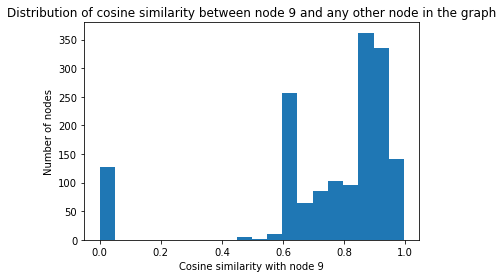

In [19]:
# 20-bin histogram showing the distribution of cosine similarity between node 9 and any other node in the graph (according to their recursive feature vectors).
sim9 = [v for k,v in dict_sim.items() if k != 9]

plt.hist(sim9, bins=20)
plt.xlabel('Cosine similarity with node 9')
plt.ylabel('Number of nodes')
plt.title('Distribution of cosine similarity between node 9 and any other node in the graph')
plt.show()

From this histogram, some groups can be spotted based on the similarity with node 9. There are at least 3 clear groups: one with no similarity at all, one with some similarity, and another one with very high similarity.

For these groups / roles in the cosine similarity histogram, take one node u from each group to examine the feature vector, and draw the subgraph of the node based on its feature vector. You can draw the subgraph by hand, or you can use libraries such as networkx or graphviz.

In [20]:
def pick_rnd_node_group(lower_bond, upper_bond, dict_similarities):
    nodes_group = [k for k,v in dict_similarities.items() if v >= lower_bond and v < upper_bond]
    pick = np.random.choice(nodes_group)
    return pick

In [21]:
def gen_subgraph(node_id, Graph, hop=3):
    
    node = Graph.GetNI(node_id) # get object 
    
    neighborhood_list = set()     # placeholder for all neighbors
    neighborhood_list.add(node_id)
    for i in range(1, hop+1):  
        NodeNum, NodeVec = Graph.GetNodesAtHop(node_id, i, False)
        for item in NodeVec:
            neighborhood_list.add(item)
    
    
    subGraph = snap.GetSubGraph(Graph, list(neighborhood_list))
    return subGraph


In [23]:

group_ranges = [(0, 0.05), (0.6, 0.65), (0.85, 0.95)]
for group in group_ranges:
    node_id = int(pick_rnd_node_group(group[0], group[1], dict_sim))
    print(node_id, dict_sim[node_id])
    subgraph = gen_subgraph(node_id, Graph, hop=1)
    
    labels = {}
    for node in subgraph.Nodes():
        labels[node.GetId()] = str(node.GetId())
    
    plotname = "subgraph" + str(node_id) + ".png"
    #snap.DrawGViz(subgraph, snap.gvlNeato, plotname, labels) - commented since it provokes kernel death
        
        
node_group0 = 9
subgraph = gen_subgraph(node_id, Graph, hop=1)
labels = {}
for node in subgraph.Nodes():
    labels[node.GetId()] = str(node.GetId())

plotname = "subgraph" + str(node_group0) + ".png"
#snap.DrawGViz(subgraph, snap.gvlNeato, potname, labels) - commented since it provokes kernel death

858 0
760 0.6311989825158971
659 0.9118905251129772


## 3 Community detection suing the Louvain algorithm [25 points]
Through this problem, we will explore some properties of the Louvain algorithm for community detection. The modularity of a weighted graph is a measure that compares the density of edges within a community to the density of edges between communities. The modularity of a graph lies in the range [ -1, 1]. Maximizing the modularity of a given graph is a computationally hard problem, so we try di erent heuristics for this purporse. One such heuristic is the Louvain algorithm. This algorithm outperforms many similar algorithms in terms of both speed as well as maximum modularity obtained. 
Each pass of the algorithm has two phases: Phase 1 (Modularity Optimization) and Phase 2 (Community Aggregation).

### 3.1 Modularity gain when an isolated node moves into a community [4 points]

Prove that the modularity gain seen when i merges with C (i.e., the change in modularity after they merge into one community) is given by:
$\Delta Q = [(\sum in + k_{i,in})/2m - ((\sum tot + k_{i})/2m)^{2}] - [\sum in/2m - (\sum tot/2m)^{2} - (k_{i}/2m)^{2}]$

by definition:

$Q_{before} = Q_{C} + Q_{i}$

$Q_{before} = (\sum in/2m - (\sum tot/2m)^{2}) + (0 - (k_{i}/2m)^{2}) = \sum in/2m - (\sum tot/2m)^{2} - (k_{i}/2m)^{2} $

$Q_{after} = (\sum in + k_{i,in})/2m - ((\sum tot + k_{i})/2m)^{2}$

Therefore:

$\Delta Q = Q_{after} - Q_{before}$

$\Delta Q = [(\sum in + k_{i,in})/2m - ((\sum tot + k_{i})/2m)^{2}] - [\sum in/2m - (\sum tot/2m)^{2} - (k_{i}/2m)^{2}]$


### 3.2 Louvain algorithm on a 16 node network [10 points]

Consider the graph G (Figure 3), with 4 cliques of 4 nodes each arranged in a ring. Assume all the edges have same weight value 1. There exists exactly one edge between any two adjacent cliques. We will manually inspect the results of the Louvain algorithm on this network. The first phase of modularity optimization detects each clique as a single community (giving 4 communities in all). After the community aggregation phase, the new network H will have 4 nodes.



What is the weight of any edge between two distinct nodes in H? [1 point] There is one edge between each clique, so one node between each 'supernode'. The answer is 1 (all edges have weight value of 1).

What is the weight of any self-edge in H? [2 point] $4*3 = 12$ (There are 4 nodes per clique and each node has 3 edges of value 1 each) 

What is the modularity of H (with each node in its own community)? [2 points] $2m = 4*12 + 4*2 = 56$; $Q_{H} = 1/56 * (12 - 14^2/56) * 4 = 0.6071$

What is the weight of any edge between two distinct nodes in J? [1point] There woud be 2 edges connecting the supernodes weighting 1 each => weight would be 2 

What is the weight of any self-edge in J? [2 point] 26 

What is the modularity of J (with each node in its own community)? [2 points] $2m = 2*26 + 2*2 = 56$; $Q_{H} = 1/56 * (26 - 28^2/56) * 2 = 0.4285$

### 3.3. Louvain algorithm on a 128 node network [10 points]

Now consider a larger version of the same network, with 32 cliques of 4 nodes each (arranged in a ring as earlier); call this network Gbig. Again, assume all the edges have same weight value 1, and there exists exactly one edge between any two adjacent cliques. The first phase of modularity optimization, as expected, detects each clique as a single community. After aggregation, this forms a new network Hbig with 32 nodes.

What is the weight of any edge between two distinct nodes in Hbig? [1 point] There is one edge between any two adjacent cliques, so 1

What is the weight of any self-edge in Hbig? [2 point] $4*3 = 12$ (There are 4 nodes per clique and each node has 3 edges of value 1 each)

What is the modularity of Hbig (with each node in its own community)? [2 points] $2m = 32 * 12 + 32 * 2 = 448$; $Q_{H} = 1/448 * (12 - 14^2/448) * 32 = 0.8259$

After what we saw in the earlier example, we would expect the algorithm to terminate here. However (spoiler alert again), that doesn't happen and the algorithm proceeds. The next phase of modularity optimization groups Hbig into 16 communities with two adjacent nodes from Hbig in each community. Call the resultant graph (after community aggregation) Jbig.

What is the weight of any edge between two distinct nodes in Jbig? [1 point] There would be one edge between any two adjacent super nodes, so 1

What is the weight of any self-edge in Jbig? [2 point] 26

What is the modularity of Jbig (with each node in its own community)? [2 points] $2m = 16 * 26 + 16 * 2 = 448$; $Q_{H} = 1/448 * (26 - 28^2/448) * 16 = 0.8661$

### 3.4 What just happened? [1 point]

Explain (in a few lines) why you think the algorithm behaved the way it did for the larger network. In other words, what might have caused modularity to be maximized with an "unintuitive" community grouping for the larger network? Modularity optimization may fail (leading to suboptimal community identification) because it is a trade off between the number of communities and the modularity value of each community.   An increase of the number of modules does not necessarily correspond to an increase in modularity because the modules would be smaller and so could be their modularity. This intuition has been further developed in Fortunato and Barthelemy's work [Resolution limit in community detection].

## 4 Spectral clustering [25 points]

This question derives a spectral clustering algorithm that we then use to analyze a real-world dataset. These algorithms use eigenvectors of matrices associated with the graph. You may  nd this handout https://bit.ly/2l0dXCL on graph clustering to be useful for additional background information.

- Let G = (V;E) be a simple (that is, no self- or multi- edges) undirected, connected graph with n = |V| and m = |E|.   
- A is the adjacency matrix of the graph G, i.e., Aij is equal to 1 if (i; j) 2 E and equal to 0 otherwise.   
- D is the diagonal matrix of degrees: Dii = SUMj Aij = the degree of node i.   
- We de ne the graph Laplacian of G by L = D - A.

### 4.1 A Spectral Algorithm for Normalized Cut Minimization: Foundations [10 points]

i) Note that each edge (i,j) will contribute with a 1 to Lii and Ljj, and with -1 to Lij and Lji, and that's how the Laplacian Matrix is computed (L = D - A).


ii) $x^T *L*x = x^T * [\sum (e_{i} - e_{j})* (e_{i} - e_{j})^T] * x $; </p>
and $x^T * (e_{i} - e_{j}) = (e_{i} - e_{j})^T * x = (x_{i} - x_{j})$; </p>
therefore  $x^T *L*x = \sum(x_{i} - x_{j})^2$

iii) If xi, xj in the same S, then xi-xj = 0. Else:  </p>
    $(\sqrt(vol(S)/\sqrt(vol(S') + \sqrt(vol(S')/\sqrt(vol(S))^2$;  </p>
    $((vol(S') + vol(S'))^2/((vol(S') * vol(S))$; </p>
    $((vol(S') + vol(S')) * ((vol(S') + vol(S'))/((vol(S') * vol(S))$; </p>
    $2m * ((vol(S') + vol(S'))/((vol(S') * vol(S))$; </p>
    $2m/c * NCUTs$
    

iv) Given that D*e = d (degree vector)
$x^T*D*e = x^T * d = \sum_{c \epsilon S} di (\sqrt(vol(S)/\sqrt(vol(S')) + \sum_{c \not{\epsilon} S} di (\sqrt(vol(S')/\sqrt(vol(S))$


v) $x^T*D*x = vol(S) + vol(S') = 2m$